# Table of Contents:
1. Import Libraries, Define Path
2. Import Files and Describe
3. Data Wrangling
4. Map the Choropleth

# 1. Import Libraries, Define Path

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

# define path
path = r'C:\Users\heidi\Desktop\Analyses\A6 Data Project'

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 2. Import Files and Describe

In [3]:
real = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.4.26.22.csv'), index_col = False)

In [4]:
real.head(15)

,Unnamed: 0,state,city,type,lat,lng,pop,male_pop,female_pop,rent_mean,...,expenses_median,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,female_age_mean,female_age_median,pct_own,rent_cost
0,0,AK,Unalaska,City,53.621091,-166.770979,4619,2725,1894,1366.24657,...,776.0,0.82841,0.82784,0.82940,38.45838,39.25000,32.78177,31.91667,0.25053,medium
1,1,AK,Eagle River,City,61.174250,-149.284329,3727,1780,1947,2347.69441,...,742.0,0.94090,0.97253,0.91503,37.26216,39.33333,38.97956,39.66667,0.94989,high
2,2,AK,Jber,City,61.284745,-149.653973,8736,5166,3570,2071.30766,...,810.0,0.99097,0.99661,0.98408,21.96291,22.25000,22.20427,23.16667,0.00759,high
3,3,AK,Anchorage,City,61.229560,-149.893037,1941,892,1049,943.79086,...,558.0,0.89274,0.94301,0.84871,35.81912,34.00000,37.00750,34.00000,0.20247,medium
4,4,AK,Anchorage,City,61.217082,-149.767214,5981,3076,2905,1372.84472,...,717.0,0.95351,0.96060,0.94669,34.13110,30.16667,34.96611,31.75000,0.56936,medium
5,5,AK,Anchorage,City,61.217507,-149.744426,5476,2916,2560,1351.27532,...,718.0,0.87941,0.90837,0.84932,29.23608,25.58333,33.63770,28.83333,0.45011,medium
6,6,AK,Anchorage,City,61.223372,-149.723327,5893,3037,2856,1022.91322,...,506.0,0.86077,0.88176,0.83415,36.01941,34.16667,34.54987,29.33333,0.51995,medium
7,7,AK,Anchorage,City,61.216701,-149.792744,7481,3766,3715,1101.88070,...,569.0,0.87654,0.88350,0.86952,30.85796,27.66667,31.90301,26.75000,0.52659,medium
8,8,AK,Anchorage,City,61.215067,-149.836271,5501,3139,2362,884.61089,...,626.0,0.79679,0.77843,0.82344,31.35271,29.00000,30.84458,27.41667,0.33319,medium
9,9,AK,Anchorage,City,61.204383,-149.852526,3225,1565,1660,991.76412,...,671.0,0.85196,0.89312,0.81628,38.86716,39.50000,43.54596,41.08333,0.38822,medium


In [5]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         39030 non-null  int64  
 1   state              39030 non-null  object 
 2   city               39030 non-null  object 
 3   type               39030 non-null  object 
 4   lat                39030 non-null  float64
 5   lng                39030 non-null  float64
 6   pop                39030 non-null  int64  
 7   male_pop           39030 non-null  int64  
 8   female_pop         39030 non-null  int64  
 9   rent_mean          38568 non-null  float64
 10  rent_median        38568 non-null  float64
 11  income_mean        38640 non-null  float64
 12  income_median      38640 non-null  float64
 13  mort_exp_mean      38189 non-null  float64
 14  mort_exp_median    38189 non-null  float64
 15  expenses_mean      38140 non-null  float64
 16  expenses_median    381

In [6]:
#drop unneeded columns
real.drop(columns = ['Unnamed: 0'], inplace = True)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              39030 non-null  object 
 1   city               39030 non-null  object 
 2   type               39030 non-null  object 
 3   lat                39030 non-null  float64
 4   lng                39030 non-null  float64
 5   pop                39030 non-null  int64  
 6   male_pop           39030 non-null  int64  
 7   female_pop         39030 non-null  int64  
 8   rent_mean          38568 non-null  float64
 9   rent_median        38568 non-null  float64
 10  income_mean        38640 non-null  float64
 11  income_median      38640 non-null  float64
 12  mort_exp_mean      38189 non-null  float64
 13  mort_exp_median    38189 non-null  float64
 14  expenses_mean      38140 non-null  float64
 15  expenses_median    38140 non-null  float64
 16  hs_degree          387

In [7]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\heidi\Desktop\Analyses\A6 Data Project\02 Data\Original Data\us-states.json'

# 3. Data Wrangling

In [8]:
# I've not been using the _median columns and will drop them for clarity
real.drop(columns = ['rent_median', 'mort_exp_median', 'income_median', 'expenses_median', 'male_age_median', 'female_age_median'], inplace = True)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             39030 non-null  object 
 1   city              39030 non-null  object 
 2   type              39030 non-null  object 
 3   lat               39030 non-null  float64
 4   lng               39030 non-null  float64
 5   pop               39030 non-null  int64  
 6   male_pop          39030 non-null  int64  
 7   female_pop        39030 non-null  int64  
 8   rent_mean         38568 non-null  float64
 9   income_mean       38640 non-null  float64
 10  mort_exp_mean     38189 non-null  float64
 11  expenses_mean     38140 non-null  float64
 12  hs_degree         38755 non-null  float64
 13  hs_degree_male    38741 non-null  float64
 14  hs_degree_female  38702 non-null  float64
 15  male_age_mean     38757 non-null  float64
 16  female_age_mean   38728 non-null  float6

In [9]:
# define data dictionary for abbreviations to full state names taken from https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [10]:
# replace the abbreviations with full state names
real.replace(abbrev_to_us_state,regex=True,inplace=True)
real['state'].value_counts(dropna = False)

California              4193
Texas                   2767
New York                2565
Florida                 2289
Pennsylvania            1735
Illinois                1593
Ohio                    1538
Michigan                1463
North Carolina          1167
Georgia                 1078
New Jersey              1009
Virginia                1006
Washington               806
Indiana                  802
Arizona                  798
Tennessee                792
Massachusetts            777
Maryland                 764
Missouri                 732
Wisconsin                732
Minnesota                699
Colorado                 668
Alabama                  612
Louisiana                608
Kentucky                 577
South Carolina           561
Oklahoma                 552
Puerto Rico              489
Oregon                   454
Connecticut              445
Kansas                   440
Iowa                     415
Arkansas                 363
Nevada                   355
Mississippi   

In [11]:
# duplicates check
dups = real.duplicated()
dups.shape # no duplicates

(39030,)

<AxesSubplot:xlabel='pop', ylabel='Count'>

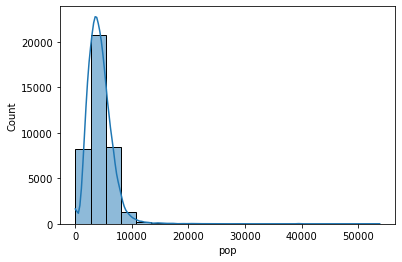

In [12]:
# check for extreme values pop
sns.histplot(real['pop'], bins = 20, kde = True)

This is expected as some areas have higher populations than others

<AxesSubplot:xlabel='hs_degree', ylabel='Count'>

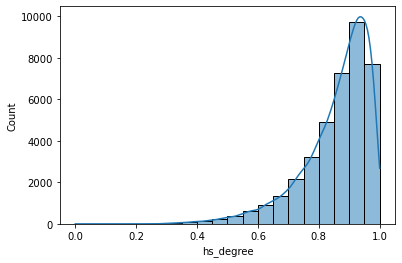

In [13]:
# check for extreme values in hs_degree
sns.histplot(real['hs_degree'], bins = 20, kde = True)

<AxesSubplot:xlabel='pct_own', ylabel='Count'>

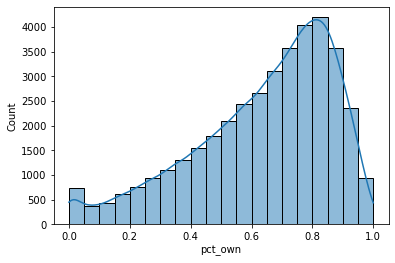

In [14]:
# check for extreme values in pct_own
sns.histplot(real['pct_own'], bins = 20, kde = True)

# 4. Map the Choropeth

In [15]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = real,
    columns = ['state', 'hs_degree'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)
map

We can see here the states with the higher percentages of high school graduates with the darker colors. Concerning are Oregon and Texas with relatively low percentages.

This does not currently answer any questions as I need to leverage high school graduation against income, rent, and percent ownership.

This map does raise questions about why Oregon and Maryland have such relatively low graduation rates.

In [36]:
#export to csv
real.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.4.30.22.csv'))